# 1. 데이터 셋 얻기

In [ ]:
from keras.datasets import imdb

(train_data ,train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


> num_words=10000은 훈련 데이터에서 가장 자주 나타나는 단어 10000개만 사용하겠다는 의미이다. 즉, 드물게 나타나는 단어는 무시하기 위해 사용한다.

In [ ]:
print(train_data[0])
print(train_labels[:10])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0]


> data는 리뷰를 의미하며 labels는 1인 경우 긍정, 0인 경우 부정을 뜻한다.

# 2. 리뷰 확인

## 2.1 리뷰 인덱스 얻기
> imdb에 별도로 저장되어 있는 word index 정보 얻기

In [ ]:
word_index = imdb.get_word_index()
word_index

## 2.2 인덱스 검색을 위한 치환
> 데이터셋에 index 정보로 이루어져 있어 key와 value를 치환한다.

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

In [ ]:
for i in range(10) :
  print(i, ' : ', reverse_word_index.get(i))

0  :  None
1  :  the
2  :  and
3  :  a
4  :  of
5  :  to
6  :  is
7  :  br
8  :  in
9  :  it


> 0의 None은 데이터가 존재하지 않기 때문에 None으로 표현한 것이다.

## 2.3 리뷰 디코딩
> 리뷰의 index 정보 0, 1, 2는 '패딩', '문서시작', '사전에 없음'으로 미리 예약되어 있는 index이기 때문에 초기값이 3으로 시작해야 한다. 위의 index 정보에서 1이 the로 사용되는데 여기에 3을 더한 4가 실제 index 정보가 된다.

In [ ]:
for i in train_data[0] :
  print(i-3, ' : ', reverse_word_index.get(i-3))

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# 3. 벡터 변환
> 신경망에서는 리스트를 텐서로 변환하여 사용해야 하며 다음과 같은 두 가지 방법으로 변환할 수 있다.
  - 같은 길이가 되도록 리스트에 패딩을 추가하고(samples, sequence_length) 크기의 정수 텐서로 변환한다. 그 다음 이 정수 텐서를 다룰 수 있는 layer를 신경망의 첫 번째 layer로 사용한다.
  - 리스트를 원-핫 인코딩으로 변환한다. 그 다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense layer를 신경망의 첫 layer로 사용한다.

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000) :
  # 25000, 10000의 벡터 텐서 생성
  results = np.zeros((len(sequences), dimension))

  # enumerate는 index와 data 정보를 반환한다.
  for i, sequence in enumerate(sequences) :
    results[i, sequence] = 1.

  return results

In [ ]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train[0, :10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

# 4. 모델 만들기

In [ ]:
from keras import models
from keras import layers

# 모델에 add를 통해 여러 layer로 구성하였음으로 모델을 네크워크라 표현하기도 한다.
model = models.Sequential()
# 10000개의 feature로 이루어진 입력 데이터를 relu 활성 함수를 이용하여 16개의 은닉 유닛을 만든다.
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# 두 번째 layer에서는 첫 번째 layer에서 input_shape를 사용했음으로 생략한 것이다.
model.add(layers.Dense(16, activation='relu'))
# 최종 layer는 긍정, 부정의 결과를 얻게 됨으로 sigmoid 함수를 이용했다.
model.add(layers.Dense(1, activation='sigmoid'))

# 5. 컴파일

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras import optimizers
from keras import metrics
from keras import losses

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

# 6. 훈련 검증
> 모델의 성능을 확인하기 위해 간단하게 검증을 진행할 것이다.

## 6.1 데이터 분리

In [ ]:
validate_X_train = X_train[:10000]
validate_y_train = y_train[:10000]

partial_X_train = X_train[10000:]
partial_y_train = y_train[10000:]

> 총 25000개의 리뷰를 검증을 위한 10000개, 훈련을 위한 15000개로 분리한다.

## 6.2 컴파일 만들기

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## 6.3 학습 시키기

In [ ]:
#model.fit(
#    # 학습 데이터
#    partial_X_train, partial_y_train, 
#    # batch_size는 한 번 실행 시 사용할 데이터의 개수이며 여기서는 512개의 리뷰를 사용했다.
#    # epochs는 모델을 학습시키기 위한 반복 횟수를 의미한다. batch_size를 하나의 묶음으로 모델을 학습시킨다.
#    epochs=2, batch_size=512
#)

## 6.4 검증하기

In [ ]:
#model.fit(
#    partial_X_train, partial_y_train, 
#    epochs=2, batch_size=512,
#    # epoch가 끝난 이후 아래의 검증 데이터로 모델을 검증한다.
#    # val_loss : 0.3236 - val_acc : 0.8706 형식으로 검증 결과를 확인할 수 있다.
#    validation_data=(validate_X_train, validate_y_train)
#)

## 6.5 GPU 사용하기


In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0' :
  raise SystemError('GPU device not found')

print('Found GPU at : ', device_name)

Found GPU at :  /device:GPU:0


> 현재 GPU가 사용 가능한지 확인한다.

In [ ]:
# 다음 코드 이후에 작성된 코드만 GPU를 사용하게 된다.
with tf.device('device:GPU:0') :
  model.fit(
    partial_X_train, partial_y_train, 
    epochs=20, batch_size=512,
    validation_data=(validate_X_train, validate_y_train)
  )

Epoch 1/20
30/30 [==============================] - 4s 41ms/step - loss: 0.5235 - accuracy: 0.7801 - val_loss: 0.4098 - val_accuracy: 0.8574
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3206 - accuracy: 0.9019 - val_loss: 0.3123 - val_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2370 - accuracy: 0.9245 - val_loss: 0.2820 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1860 - accuracy: 0.9383 - val_loss: 0.2727 - val_accuracy: 0.8921
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1503 - accuracy: 0.9507 - val_loss: 0.2890 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1250 - accuracy: 0.9607 - val_loss: 0.2979 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1027 - accuracy: 0.9695 - val_loss: 0.3009 - val_accuracy: 0.8845
Epoch 8/20
30

In [ ]:
history = model.fit(
    partial_X_train, partial_y_train, 
    epochs=20, batch_size=512,
    validation_data=(validate_X_train, validate_y_train)
)

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.7224 - val_accuracy: 0.8645
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.7560 - val_accuracy: 0.8643
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.7971 - val_accuracy: 0.8614
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.8147 - val_accuracy: 0.8640
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.8573 - val_accuracy: 0.8604
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.8924 - val_accuracy: 0.8638
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 8.6843e-04 - accuracy: 0.9999 - val_loss: 0.9134 - val_accuracy: 0.8627
Epoch 8/2

## 6.6 차트를 통한 결과 확인

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

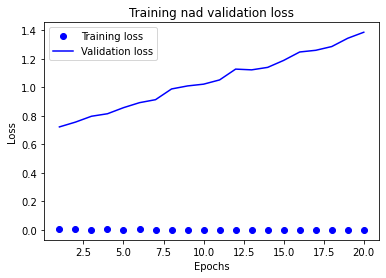

In [ ]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training nad validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

> 4번째 epoch까지는 훈련데이터와 검증데이터의 손실 수치가 낮이지지만 그 이후에는 검증데이터의 손실 수치가 다시 올라가고 있다. 이러한 경우를 훈련데이터에 과적합되었다고 표현한다.

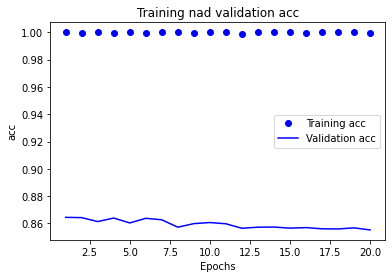

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training nad validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

> 정확도도 마찬가지로 epoch가 4를 넘기면 과적합하게 된다.

## 6.7 평가하기

In [ ]:
result = model. evaluate(X_test, y_test)
result

782/782 [==============================] - 2s 3ms/step - loss: 1.5334 - accuracy: 0.8400


[1.5334272384643555, 0.8400400280952454]

# 7. 모델 다시 만들기

## 7.1 데이터셋 얻기

In [ ]:
from keras.datasets import imdb

(train_data ,train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## 7.2 전처리

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000) :
  # 25000, 10000의 벡터 텐서 생성
  results = np.zeros((len(sequences), dimension))

  # enumerate는 index와 data 정보를 반환한다.
  for i, sequence in enumerate(sequences) :
    results[i, sequence] = 1.

  return results

In [ ]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train[0, :10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

## 7.3 모델 만들기

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## 7.4 데이터 분리

In [ ]:
validate_X_train = X_train[:10000]
validate_y_train = y_train[:10000]

partial_X_train = X_train[10000:]
partial_y_train = y_train[10000:]

## 7.5 컴파일

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## 7.6 학습시키기

In [ ]:
history = model.fit(
    partial_X_train, partial_y_train, 
    epochs=20, batch_size=512,
    validation_data=(validate_X_train, validate_y_train)
)

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5223 - accuracy: 0.7851 - val_loss: 0.3896 - val_accuracy: 0.8763
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3102 - accuracy: 0.9043 - val_loss: 0.3069 - val_accuracy: 0.8903
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2257 - accuracy: 0.9292 - val_loss: 0.2901 - val_accuracy: 0.8865
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1761 - accuracy: 0.9437 - val_loss: 0.2867 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1428 - accuracy: 0.9577 - val_loss: 0.2906 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1187 - accuracy: 0.9644 - val_loss: 0.3004 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0985 - accuracy: 0.9703 - val_loss: 0.3430 - val_accuracy: 0.8718
Epoch 8/20
30

## 7.7 평가하기

In [ ]:
result = model.evaluate(X_test, y_test)
result

782/782 [==============================] - 2s 3ms/step - loss: 0.8047 - accuracy: 0.8380


[0.8047239184379578, 0.8379600048065186]

#8.layer 조절
> layer의 개수 가감,수치 가감